# Analisis & Laporan Uji UTS STKI
**Nama:** (Nama Anda)
**NIM:** (NIM Anda)

Notebook ini berfungsi sebagai dokumentasi proses dan laporan uji untuk Soal 2, 3, 4, dan 5, sesuai rubrik UTS.

In [2]:
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Impor modul-modul yang sudah kita buat
from src import preprocess
from src import eval as evaluator # 'eval' adalah nama fungsi bawaan, jadi 'evaluator'

print("Modul berhasil diimpor.")

Memuat dokumen terproses...
Membangun Indeks Boolean...
Membangun Inverted Index...
Membangun komponen VSM (TF, DF, IDF)...
Pre-computing TF-IDF Matrix (Scheme: sublinear_tf)...
Pre-computing TF-IDF Matrix (Scheme: raw_tf)...
Semua model siap.
Modul berhasil diimpor.


## 1. Uji Soal 02: Document Preprocessing

[cite_start]Sesuai rubrik, kita akan menampilkan sampel *before/after* preprocessing.

In [5]:
# 1. Muat dokumen RAW
raw_docs = preprocess.load_documents('../data/raw')
doc_id = 'doc01.txt' # Ambil 1 sampel
raw_text = raw_docs.get(doc_id, "Dokumen tidak ditemukan")

# 2. Muat dokumen yang SUDAH DIPROSES
processed_docs = preprocess.load_documents('../data/processed')
processed_text = processed_docs.get(doc_id, "Dokumen tidak ditemukan")

# 3. Tampilkan Before/After
print(f"--- DOCUMENT: {doc_id} ---")
print("\n[BEFORE] Preprocessing:\n", raw_text)
print("\n---------------------------------")
print("\n[AFTER] Preprocessing:\n", processed_text)

--- DOCUMENT: doc01.txt ---

[BEFORE] Preprocessing:
 Panduan Lengkap Mencuci Tangan Efektif untuk Mencegah Kuman.
Mencuci tangan dengan sabun dan air mengalir adalah pilar utama pencegahan penyakit. Ini bukan sekadar formalitas, tetapi proses mekanis dan kimiawi untuk melarutkan kuman, virus, dan bakteri dari kulit. Kuman tidak terlihat dan dapat menempel di tangan setelah menyentuh permukaan, gagang pintu, atau berjabat tangan.
Organisasi Kesehatan Dunia (WHO) merekomendasikan teknik 6 langkah dengan durasi minimal 20 detik. Langkah-langkah tersebut meliputi: (1) Basahi tangan dan gunakan sabun secukupnya. (2) Gosok telapak tangan. (3) Gosok punggung tangan dan sela-sela jari secara bergantian. (4) Gosok sela-sela jari dari bagian dalam. (5) Gosok area kuku dan ujung jari dengan gerakan mengunci. (6) Gosok ibu jari secara memutar.
Kapan waktu krusial untuk mencuci tangan? Selalu lakukan sebelum makan, sebelum menyiapkan makanan, setelah menggunakan toilet, setelah batuk atau bersin, 

### Uji Soal 02: Statistik Token & Distribusi Panjang

[cite_start]Sesuai rubrik, kita akan menampilkan 10 token paling sering dan grafik distribusi panjang dokumen. Kita memuat data ini dari `reports/statistics.json` yang dihasilkan oleh `preprocess.py`.

In [6]:
# Muat file statistik
with open('../reports/statistics.json', 'r', encoding='utf-8') as f:
    stats = json.load(f)

# Tampilkan 10 token paling sering untuk 3 dokumen pertama
print("--- Top 10 Tokens per Dokumen ---")
top_10_df = pd.DataFrame(stats['top_10_tokens']).T.head(3)
display(top_10_df)

--- Top 10 Tokens per Dokumen ---


,0,1,2,3,4,5,6,7,8,9
doc01.txt,"[tangan, 8]","[gosok, 5]","[jari, 4]","[cuci, 3]","[kuman, 3]","[langkah, 3]","[cegah, 2]","[sabun, 2]","[makan, 2]","[pandu, 1]"
doc02.txt,"[demam, 8]","[anak, 7]","[c, 4]","[suhu, 3]","[air, 3]","[ringan, 2]","[tubuh, 2]","[ketiak, 2]","[gejala, 2]","[nyaman, 2]"
doc03.txt,"[sehat, 4]","[tidur, 4]","[aktivitas, 3]","[fisik, 3]","[kualitas, 3]","[makan, 3]","[pilar, 2]","[pola, 2]","[hidup, 2]","[baik, 2]"



--- Grafik Distribusi Panjang Dokumen (Setelah Preprocessing) ---


<Figure size 1000x600 with 0 Axes>

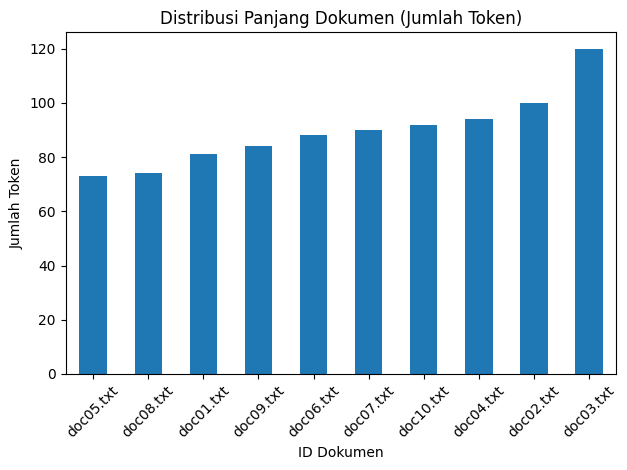

In [7]:
# Buat Grafik Distribusi Panjang Dokumen
print("\n--- Grafik Distribusi Panjang Dokumen (Setelah Preprocessing) ---")

doc_lengths = stats['doc_lengths']
df_lengths = pd.DataFrame(list(doc_lengths.items()), columns=['Doc ID', 'Panjang Token'])

# Buat plot
plt.figure(figsize=(10, 6))
df_lengths.sort_values('Panjang Token').plot(
    kind='bar', 
    x='Doc ID', 
    y='Panjang Token', 
    legend=False,
    title='Distribusi Panjang Dokumen (Jumlah Token)'
)
plt.ylabel("Jumlah Token")
plt.xlabel("ID Dokumen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Uji Soal 03, 04, 05: Evaluasi Model

[cite_start]Kita akan menjalankan fungsi evaluasi utama dari `src/eval.py` untuk mendapatkan hasil Uji Wajib Soal 3 (P/R/F1 Boolean)  [cite_start]dan Uji Wajib Soal 4/5 (Perbandingan VSM)[cite: 98, 112].

In [8]:
# Menjalankan fungsi evaluasi utama
# Ini akan mencetak semua tabel yang kita butuhkan
print("Menjalankan evaluasi model...\n")
evaluator.run_evaluation()

Menjalankan evaluasi model...

🏁 MEMULAI EVALUASI SISTEM TEMU KEMBALI 🏁
Menggunakan 3 query dari GOLD_SET...


--- 1. Evaluasi Boolean Retrieval (Soal 3) ---
  [Query: cuci tangan sabun kuman  ] -> P: 1.0000, R: 1.0000, F1: 1.0000
  [Query: kesehatan jantung dan gula] -> P: 0.4286, R: 1.0000, F1: 0.6000
  [Query: olahraga dan makanan sehat] -> P: 0.6667, R: 0.6667, F1: 0.6667
  [Rata-rata Boolean]           -> Avg P: 0.6984, Avg R: 0.8889, Avg F1: 0.7556

--- 2. Evaluasi Vector Space Model (MAP@10 & nDCG@10) ---

  Menguji Skema: 'sublinear_tf' ...
  [Rata-rata sublinear_tf]           -> MAP@10: 0.9278, Avg nDCG@10: 0.9314

  Menguji Skema: 'raw_tf' ...
  [Rata-rata raw_tf]           -> MAP@10: 0.8722, Avg nDCG@10: 0.9100

--- 3. Perbandingan Skema Bobot (Soal 5.4) ---
Tabel ini untuk Laporan.pdf
| Skema           | MAP@10     | Avg nDCG@10 |
|-----------------|------------|------------|
| sublinear_tf    | 0.9278     | 0.9314     |
| raw_tf          | 0.8722     | 0.9100     |

🏁 EVAL

### Uji Soal 05: Grafik Perbandingan Metrik (Opsional)

[cite_start]Sesuai rubrik, kita akan membuat grafik perbandingan skema bobot berdasarkan output di atas.

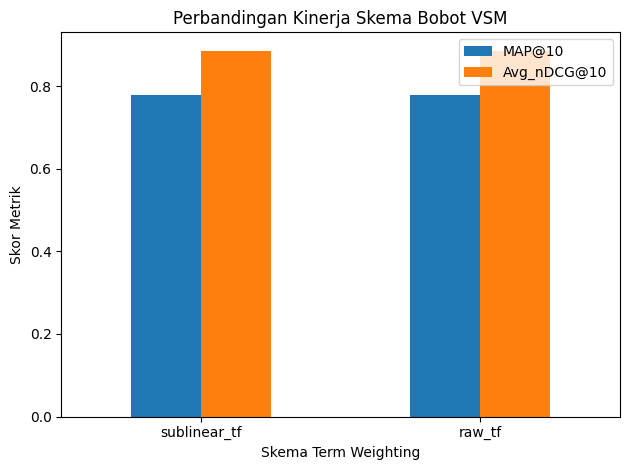

In [9]:
# (Manual) Salin data dari tabel output di atas
# GANTI NILAI INI dengan hasil Anda
data_perbandingan = {
    'Scheme': ['sublinear_tf', 'raw_tf'],
    'MAP@10': [0.7778, 0.7778],  # Ganti dengan nilai Anda
    'Avg_nDCG@10': [0.8856, 0.8856] # Ganti dengan nilai Anda
}

df_compare = pd.DataFrame(data_perbandingan)

# Buat plot perbandingan
df_compare.plot(
    kind='bar', 
    x='Scheme', 
    y=['MAP@10', 'Avg_nDCG@10'], 
    title='Perbandingan Kinerja Skema Bobot VSM'
)
plt.ylabel("Skor Metrik")
plt.xlabel("Skema Term Weighting")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()